In [1]:
import time, datetime
from fyers_apiv3 import fyersModel
client_id = "ZHQ4IJL7TI-100"
with open("access_token", "r") as f:
    access_token = f.read()

fyers = fyersModel.FyersModel(client_id=client_id, is_async=False, token=access_token, log_path="")

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from indicators.syncind import SyncInd
from indicators.classic import SMA, Alligator, SmoothMA, RSI, MACD, ATR, WMA, EMA, RMA, VolumeROC, KAMA
from indicators.candle import OHLC

In [4]:
date_today = datetime.datetime.now().strftime("%Y-%m-%d")
date_100_p = (datetime.datetime.now() - datetime.timedelta(days=100)).strftime("%Y-%m-%d")
date_today, date_100_p

('2024-11-25', '2024-08-17')

In [5]:
response = fyers.history(data={
                                "symbol": "NSE:ZEEL-EQ",
                                "resolution": "1",
                                "date_format": "1",
                                "range_from": date_100_p,
                                "range_to": date_today,
                                "cont_flag": "1"
                                })

len(response['candles']), response

(25185,
 {'candles': [[1724039100, 135.5, 135.66, 134.95, 135.5, 100841],
   [1724039160, 135.5, 135.54, 135.08, 135.32, 33824],
   [1724039220, 135.42, 135.49, 135.3, 135.41, 29828],
   [1724039280, 135.41, 135.41, 135.15, 135.37, 26384],
   [1724039340, 135.32, 135.41, 135.14, 135.25, 33464],
   [1724039400, 135.2, 135.3, 135.15, 135.3, 12247],
   [1724039460, 135.3, 135.42, 135.24, 135.37, 12040],
   [1724039520, 135.35, 135.58, 135.35, 135.51, 12047],
   [1724039580, 135.56, 135.56, 135.42, 135.47, 16980],
   [1724039640, 135.5, 135.79, 135.5, 135.51, 52311],
   [1724039700, 135.55, 135.9, 135.48, 135.89, 27375],
   [1724039760, 135.89, 135.89, 135.72, 135.8, 29835],
   [1724039820, 135.8, 135.8, 135.6, 135.79, 22279],
   [1724039880, 135.79, 136.15, 135.69, 136.15, 84213],
   [1724039940, 136.15, 136.2, 135.9, 136.15, 657053],
   [1724040000, 136.15, 136.22, 136, 136.15, 320847],
   [1724040060, 136.15, 136.29, 136.01, 136.29, 323912],
   [1724040120, 136.29, 136.4, 136.11, 136.29

In [6]:
candles = np.array(response['candles'])
type(candles), candles

(numpy.ndarray,
 array([[1.72403910e+09, 1.35500000e+02, 1.35660000e+02, 1.34950000e+02,
         1.35500000e+02, 1.00841000e+05],
        [1.72403916e+09, 1.35500000e+02, 1.35540000e+02, 1.35080000e+02,
         1.35320000e+02, 3.38240000e+04],
        [1.72403922e+09, 1.35420000e+02, 1.35490000e+02, 1.35300000e+02,
         1.35410000e+02, 2.98280000e+04],
        ...,
        [1.73252862e+09, 1.18650000e+02, 1.18700000e+02, 1.18600000e+02,
         1.18600000e+02, 5.50380000e+04],
        [1.73252868e+09, 1.18600000e+02, 1.18690000e+02, 1.18600000e+02,
         1.18680000e+02, 2.83900000e+04],
        [1.73252874e+09, 1.18680000e+02, 1.18680000e+02, 1.18500000e+02,
         1.18500000e+02, 3.58820000e+04]]))

In [10]:
sync = SyncInd( 
    # SMA(5),
    # Alligator(show_jaw=False, show_teeth=False)
    KAMA(highlight=True)
)
                
for c in candles:
    sync.append(c)
sync.last_candle().shape

(8,)

In [17]:
sync.last_candle()

array([1732528768.0, 118.68000030517578, 118.68000030517578, 118.5, 118.5,
       35882.0, 118.43928539058196, 1.0], dtype=object)

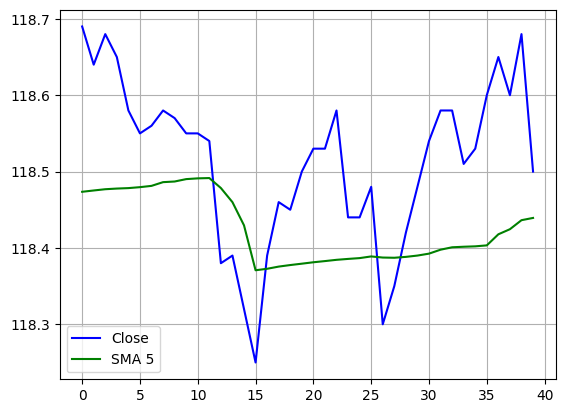

In [14]:
last_candle_show = 40
plt.plot(sync.data()[-last_candle_show:, 4], label="Close", color="blue")
# plt.plot(sync.data()[-last_candle_show:, 7], label="KAMA", color="red")
plt.plot(sync.data()[-last_candle_show:, 6], label="SMA 5", color="green")
# plt.plot(sync.data()[-last_candle_show:, 7], label="color", color="pink")
plt.grid()
plt.legend()
plt.show()

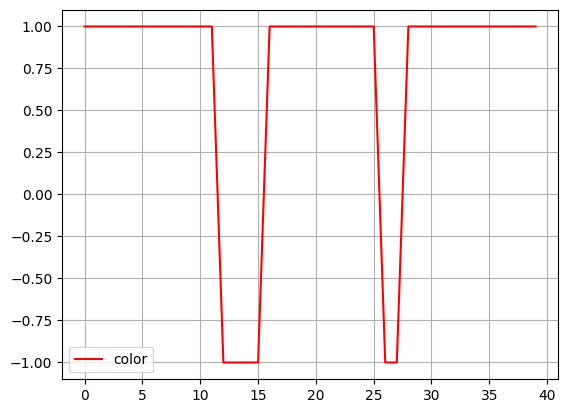

In [16]:
plt.plot(sync.data()[-last_candle_show:, 7], label="color", color="red")
plt.grid()
plt.legend()
plt.show()

In [ ]:
candles[0][4]

In [ ]:
datetime.datetime.fromtimestamp(int(sync.last_candle()[0])).strftime("%H-%M")